In [25]:
from google.colab import files
uploaded = files.upload()


Saving Lungcancer Detection.zip to Lungcancer Detection.zip


In [26]:
import zipfile
import os

zip_file_path = next(iter(uploaded))
destination_path = "/content"  # You can change this path if needed

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(destination_path)

# List the extracted files and folders
extracted_files = os.listdir(destination_path)
print("Extracted files and folders:", extracted_files)


Extracted files and folders: ['.config', '__MACOSX', 'ngrok-stable-linux-amd64.zip', 'gdrive', 'Lungcancer Detection.zip', '.ipynb_checkpoints', 'Lungcancer Detection', 'sample_data']


In [1]:
import tensorflow as tf
import cv2
import os
from PIL import Image
import numpy as np
from numpy import asarray
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from sklearn.utils import shuffle
from tensorflow.keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import History

image_directory = ('/content/Lungcancer Detection/CT-Scan Images') #choose the correct path for the directory
tumour_images = os.listdir('/content/Lungcancer Detection/CT-Scan Images/Cancerous raw images-jpg') #choose the correct path for the directory
no_tumour_images = os.listdir('/content/Lungcancer Detection/CT-Scan Images/Non-Cancerous raw images - jpg') #choose the correct path for the directory
dataset=[]
label=[]
INPUT_SIZE = 64
print(tumour_images)

print(no_tumour_images)

['Cancerous102.jpg', 'Cancerous198.jpg', 'Cancerous21.jpg', 'Cancerous167.jpg', 'Cancerous231.jpg', 'Cancerous36.jpg', 'Cancerous144.jpg', 'Cancerous12.jpg', 'Cancerous151.jpg', 'Cancerous123.jpg', 'Cancerous121.jpg', 'Cancerous85.jpg', 'Cancerous164.jpg', 'Cancerous79.jpg', 'Cancerous236.jpg', 'Cancerous157.jpg', 'Cancerous4.jpg', 'Cancerous71.jpg', 'Cancerous122.jpg', 'Cancerous103.jpg', 'Cancerous38.jpg', 'Cancerous75.jpg', 'Cancerous233.jpg', 'Cancerous224.jpg', 'Cancerous51.jpg', 'Cancerous60.jpg', 'Cancerous7.jpg', 'Cancerous211.jpg', 'Cancerous119.jpg', 'Cancerous186.jpg', 'Cancerous14.jpg', 'Cancerous202.jpg', 'Cancerous8.jpg', 'Cancerous78.jpg', 'Cancerous30.jpg', 'Cancerous135.jpg', 'Cancerous184.jpg', 'Cancerous97.jpg', 'Cancerous180.jpg', 'Cancerous112.jpg', 'Cancerous228.jpg', 'Cancerous238.jpg', 'Cancerous91.jpg', 'Cancerous113.jpg', 'Cancerous168.jpg', 'Cancerous115.jpg', 'Cancerous34.jpg', 'Cancerous18.jpg', 'Cancerous215.jpg', 'Cancerous25.jpg', 'Cancerous201.jpg', 'Ca

In [ ]:

#path = 'Cancerous156.jpg'
#print(path.split('.')[1])

In [2]:
#Iterating through all the images in the cancerous raw images and non-cancerous raw images folders

for i, image_name in enumerate(tumour_images):
   if(image_name.split('.')[1]=='jpg'):
       image=cv2.imread('/content/Lungcancer Detection/CT-Scan Images/Cancerous raw images-jpg/' #choose the correct path for the directory
       +image_name)
       image=Image.fromarray(image, 'RGB')#converting the image to an array
       image=image.resize((INPUT_SIZE,INPUT_SIZE)) # Resizing the image
       dataset.append(np.array(image))#appending the dataset in numpy array format
       label.append(1) #Has lung cancer


for i, image_name in enumerate(no_tumour_images):
   if(image_name.split('.')[1]=='jpg'):
       image=cv2.imread('/content/Lungcancer Detection/CT-Scan Images/Non-Cancerous raw images - jpg/' #choose the correct path for the directory
                        +image_name)
       image=Image.fromarray(image,'RGB') #converting the image to an array
       image=image.resize((INPUT_SIZE,INPUT_SIZE)) # Resizing the image
       dataset.append(np.array(image))#appending the dataset in numpy array format
       label.append(0) #Has no lung cancer

print(dataset)
print(label)
print(len(dataset))
print(len(label))


[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[83,  0, 68],
        [83,  0, 68],
        [83,  0, 68],
        ...,
        [83,  0, 68],
        [83,  0, 68],
        [83,  0, 68]],

       [[83,  0, 68],
        [83,  0, 68],
       

In [3]:
#image is converted to array
dataset = np.array(dataset)
label = np.array(label)

In [4]:
#Splitting data into test and train

x_train,x_test,y_train,y_test = train_test_split(dataset,label,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(254, 64, 64, 3)
(254,)
(110, 64, 64, 3)
(110,)


In [5]:
x_train = normalize(x_train,axis=1)
x_test = normalize(x_test,axis=1)

Epoch 1/10
16/16 [==============================] - 6s 165ms/step - loss: 0.5446 - accuracy: 0.7402 - val_loss: 0.3991 - val_accuracy: 0.8182
Epoch 2/10
16/16 [==============================] - 1s 84ms/step - loss: 0.3296 - accuracy: 0.8583 - val_loss: 0.2391 - val_accuracy: 0.9000
Epoch 3/10
16/16 [==============================] - 1s 85ms/step - loss: 0.2155 - accuracy: 0.9134 - val_loss: 0.1217 - val_accuracy: 0.9636
Epoch 4/10
16/16 [==============================] - 1s 83ms/step - loss: 0.1339 - accuracy: 0.9370 - val_loss: 0.0939 - val_accuracy: 0.9727
Epoch 5/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0961 - accuracy: 0.9606 - val_loss: 0.1429 - val_accuracy: 0.9636
Epoch 6/10
16/16 [==============================] - 1s 83ms/step - loss: 0.0868 - accuracy: 0.9803 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 1s 85ms/step - loss: 0.0583 - accuracy: 0.9843 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 8/10
1

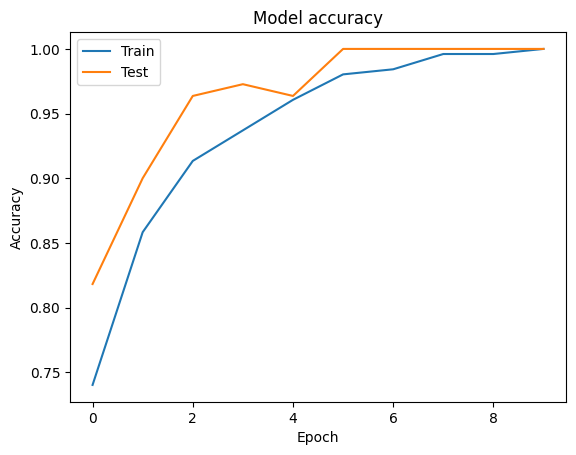

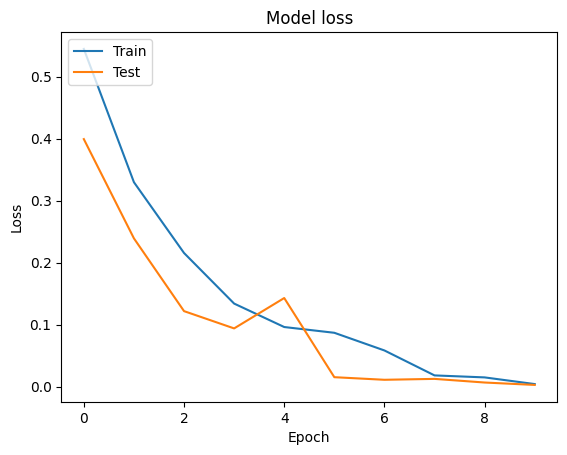

In [7]:
model = Sequential()

#Adding the first layer

model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = History()
model.fit(x_train,y_train,batch_size=16,verbose=1,epochs=10,validation_data=(x_test,y_test),shuffle=False,callbacks=[history])

#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[history])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/Lungcancer Detection/static/accuracy_plot.png')  # Save plot as image
plt.show()
plt.close()  # Close the figure

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/Lungcancer Detection/static/loss_plot.png')  # Save plot as image
plt.show()
plt.close()  # Close the figure

model.save('/content/Lungcancer Detection/My_model')


In [8]:
#TESTING THE MODEL

from keras.models import load_model

model = load_model('/content/Lungcancer Detection/My_model') #Save your model in a location

images = cv2.imread('/content/Lungcancer Detection/Prediction/pred57.jpg') #choose the correct path
img = Image.fromarray(images)
img = img.resize((64,64))
img = np.array(img)
input_img = np.expand_dims(img,axis=0)
results= (model.predict(input_img) > 0.5).astype("int32")

print(results)

1/1 [==============================] - 0s 143ms/step
[[1]]


In [9]:
score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.0027297025080770254
Test accuracy:  1.0


In [10]:
!pip install flask
!pip install flask-ngrok

In [11]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip


--2023-08-06 08:42:35--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  12.9MB/s    in 1.0s    

2023-08-06 08:42:37 (12.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [12]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [13]:
!mv ngrok /usr/bin/

In [14]:
#Add ngrok token from https://dashboard.ngrok.com/get-started/your-authtoken
!ngrok authtoken 2TD7cUCl0yxooVQjaeQTtuy0XCK_7uXy6rPUaC6bsGEhkam21

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [27]:
#CREATING FLASK APP

from flask import Flask, request, jsonify, render_template, Response
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from io import BytesIO

app = Flask(__name__,template_folder='/content/Lungcancer Detection/templates')
run_with_ngrok(app)  # Start ngrok when the app is run
model = load_model('/content/Lungcancer Detection/My_model')

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        file = request.files['file']
        file = BytesIO(file.read())
        img = load_img(file, target_size=(64, 64))
        img = np.array(img)
        img = img.reshape((1, 64, 64, 3))  # Reshape the image to match the model input shape
        prediction = model.predict(img)
        # return render_template('result.html', prediction=prediction[0][0])
        return render_template('result.html', prediction=float(prediction[0][0]))
    return render_template('index.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://adaa-34-32-208-231.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [06/Aug/2023 09:10:50] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Aug/2023 09:10:51] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 146ms/step


INFO:werkzeug:127.0.0.1 - - [06/Aug/2023 09:11:10] "POST / HTTP/1.1" 200 -


In [ ]:
pip install --upgrade tensorflow

In [ ]:
!pip install -U scikit-learn



In [14]:
pip install pyyaml h5py

In [16]:
!pip install --upgrade keras



In [20]:
!pip install pillow

In [24]:
!python --version
import keras
print('Keras version is',keras. __version__)
import tensorflow as tf
print('Tensorflow version is',tf.__version__)
import flask
print('Flask version is',flask.__version__)

Python 3.10.12
Keras version is 2.13.1
Tensorflow version is 2.13.0
Flask version is 2.2.5
